In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from harp_resources import process, utils
from sleap import load_and_process as lp
from harp_resources import process, utils
import os
import matplotlib.patches as patches
from pathlib import Path


In [2]:
# Set global font properties
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
plt.rcParams['font.sans-serif'] = ['Arial']  # Specify a specific serif font
plt.rcParams['font.size'] = 8  # Default font size for all text elements
plt.rcParams['axes.titlesize'] = 8  # Font size for axes titles
plt.rcParams['axes.labelsize'] = 8  # Font size for axes labels
plt.rcParams['xtick.labelsize'] = 8  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 8  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 8  # Font size for legend text

In [3]:
# Open the HDF5 file
data_path = Path('/Volumes/sambashare/data/ONIX/rotation_exp/B3M6/2024-09-18T13-02-51')
resampled_streams = utils.load_streams_from_h5(data_path)
#print(resampled_streams)

In [12]:
saccade_times, saccade_amplitudes = lp.detect_saccades_with_threshold(resampled_streams['SleapVideoData2']['Ellipse.Center.X'], threshold_std_times =5)

Assuming camera frame rate of 60 Hz
Found 124 saccades with chosen threshold of 5.817786659768969 (mean + 5 times the standard deviation).
Saccade frequency = 26.955486492187436 events per minute


In [13]:
print(saccade_times)

Index([518206.4963, 518210.8931, 518214.2662, 518216.9996, 518222.5994,
       518224.6069, 518226.1159, 518227.0992, 518228.6162,  518229.496,
       ...
       518434.7862,  518437.694, 518438.7583, 518442.3524, 518445.2778,
       518452.0856, 518462.3962, 518466.3119, 518466.5689, 518466.9119],
      dtype='float64', length=124)


In [39]:
running = resampled_streams['H1']['OpticalTrackingRead0X(46)']
rotation = resampled_streams['H1']['OpticalTrackingRead0Y(46)']
pupil_diameter = resampled_streams['SleapVideoData2']['Ellipse.Diameter']
eye_movements = resampled_streams['SleapVideoData2']['Ellipse.Center.X']

In [51]:
time = running.index
time_diff=np.diff(time)
t = (time - time[0])
print(time)
print(time_diff)


Index([ 518195.765, 518195.7651, 518195.7652, 518195.7653, 518195.7654,
       518195.7655, 518195.7656, 518195.7657, 518195.7658, 518195.7659,
       ...
       518471.7747, 518471.7748, 518471.7749,  518471.775, 518471.7751,
       518471.7752, 518471.7753, 518471.7754, 518471.7755, 518471.7756],
      dtype='float64', length=2760107)
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]


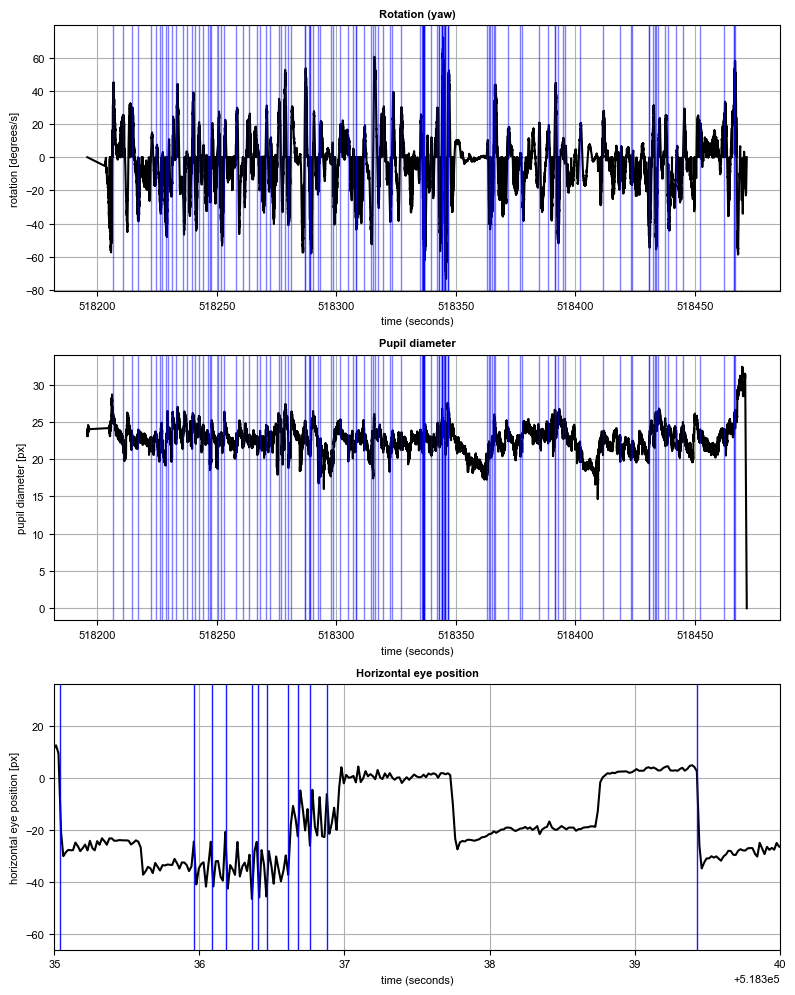

In [49]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

#slicing data
# start_time = 140  # Start from 140 seconds
# end_time = 200
# mask = (t >= start_time) & (t <= end_time)
# t_filtered = t[mask] 

#or: use t-10 in the plots to plot 10 seconds in for example
#plotting rotation
ax[0].grid()
ax[0].set_title('Rotation (yaw)', fontweight='bold')
ax[0].set_xlabel('time (seconds)')
ax[0].set_ylabel('rotation [degrees/s]')
ax[0].plot(rotation, color='black', alpha=1)
for saccade_time in saccade_times:
    ax[0].axvline(x=saccade_time, color='blue', linewidth=1, alpha=0.5)

#slicing data #plotting diameter
ax[1].grid()
ax[1].plot(pupil_diameter, color='black')
ax[1].set_title('Pupil diameter', fontweight='bold')
ax[1].set_xlabel('time (seconds)')
ax[1].set_ylabel('pupil diameter [px]')
for saccade_time in saccade_times:
    ax[1].axvline(x=saccade_time, color='blue', linewidth=1, alpha=0.5)

# #plotting horizontal pupil
ax[2].grid()
ax[2].plot(eye_movements, color='black')
ax[2].set_title('Horizontal eye position', fontweight='bold')
ax[2].set_xlim(518335, 518340)

ax[2].set_xlabel('time (seconds)')
ax[2].set_ylabel('horizontal eye position [px]')
for saccade_time in saccade_times:
    ax[2].axvline(x=saccade_time, color='blue', linewidth=1, alpha=0.9)

# #plotting vertical pupil
# ax[3].grid()
# ax[3].plot(t_filtered, vertical_eye[mask], color='royalblue')
# ax[3].set_title('Vertical eye position', fontweight='bold')
# ax[3].set_xlim([start_time, end_time])
# ax[3].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[3].set_xlabel('time (seconds)')
# ax[3].set_ylabel('vertical eye position [px]')

plt.tight_layout()  # Adjust layout
#plt.savefig('rotation_B3M3_novert_nodiameter_saccade_times.png', dpi=600)  # Save as PNG with 300 DPI



In [42]:
data = {
    'saccade_times': saccade_times,         # The times of the saccades
}
df = pd.DataFrame(data)

print(df)
df.to_excel('saccade_times.xlsx', index=False)


     saccade_times
0      518206.4963
1      518210.8931
2      518214.2662
3      518216.9996
4      518222.5994
..             ...
119    518452.0856
120    518462.3962
121    518466.3119
122    518466.5689
123    518466.9119

[124 rows x 1 columns]
